# MLDM Lab week 5: SVM and Clustering and application in hand-written digit recognition 

<h3> <font color="blue"> Introduction </h3>

In this lab session, we explore a new dataset on hand-written digits and use SVM and clustering algorithms for hand-written digit recognition.
    
We also revisit the Iris and the Breast Cancer datasets from previous lab sessions and train new classifiers and compare the results with previous classifiers. Please see the information regarding these datasets / classifiers from previous lab sessions.

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1.  Exploring hand-written digit recognition dataset. </p>
<p> 2.  Learn how to use SVM and clustering algorithms from relevant `sklearn` libraries. </p>

## <font color="blue"> Hand-written digit recognition dataset
In this section we explore the hand-written digit recognition dataset from `sklearn`.
    
This dataset is made up of 1797 8x8 images. Each image, like the ones shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we'd have to first transform it into a feature vector with length 64. See here
<https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits>_ for more information about this dataset.

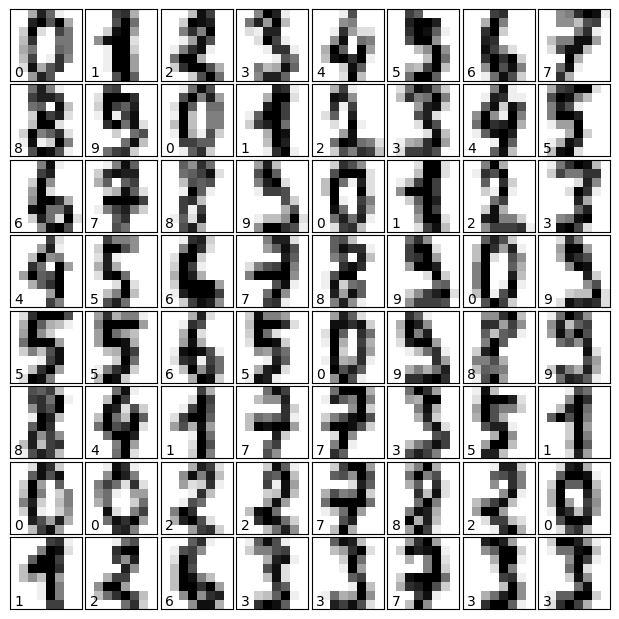

In [1]:
from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## <font color="blue"> Hand-written digit recognition using SVM
In this section we train an SVM classifier for the task of hand-written digit recognition using the dataset described above.
    
We use an implementation of SVM from `sklearn`. More information on this implementation can be found <a href="https://scikit-learn.org/stable/modules/svm.html">here</a>.

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

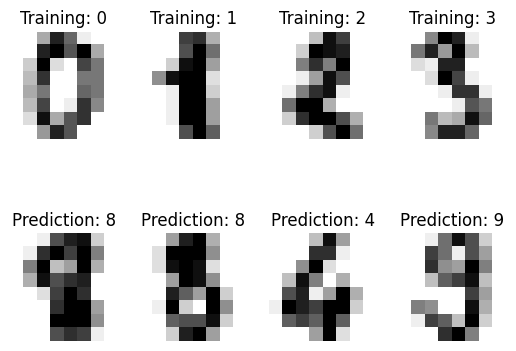

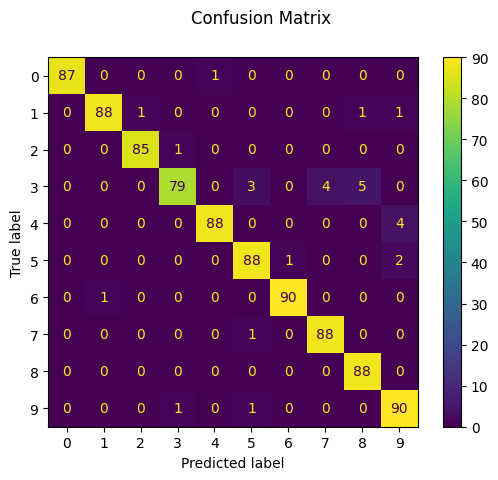

In [2]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

<h3><font color="red">Exercise 1 </font> </h3>
<p> <p>Repeat the experiment above and compare the performance (accuracy) of SVM with a Naive Bayes classifier on the digits dataset (you can use the codes from last week)</p>

In [3]:
# Answer to Exercise 1


## <font color="blue"> Hand-written digit recognition using PCA and K-means
    
In this section we use a combination of PCA (to reduce the data) and K-means (for clustering) for the task of hand-written digit recognition using the dataset described above. We also plot a Voronoi Diagram to visualise the clusters.
    
We use the implementations of PCA and K-means from `sklearn.decomposition` and `sklearn.cluster`. More information about the PCA implementation can be found <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">here</a>  and more information about the K-means implementation can be found <a href="https://scikit-learn.org/stable/modules/clustering.html#k-means">here</a>  

n_digits: 10, 	 n_samples 1797, 	 n_features 64

-------------- Metrics before PCA -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	64	0.13s	69813	0.650	0.694	0.671	0.534	0.668	0.123
__________________________________________________________________________________

-------------- Metrics after PCA with r=24 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	24	0.04s	52271	0.600	0.647	0.623	0.468	0.619	0.187
__________________________________________________________________________________

-------------- Metrics after PCA with r=2 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.05s	2815	0.459	0.470	0.464	0.326	0.4

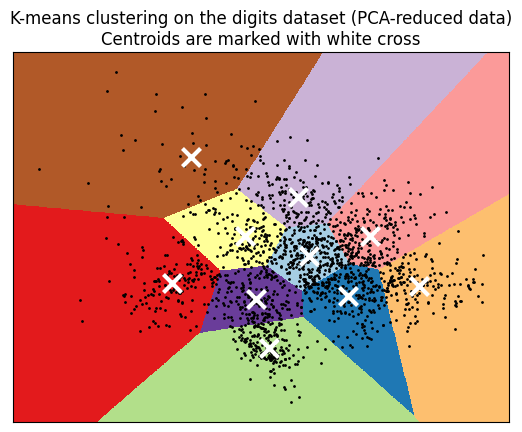

In [4]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print('\n-------------- Metrics before PCA -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    
        
    print('%-9s\t%i\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, data.shape[1],(time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

#bench_k_means(KMeans(init='random init.', n_clusters=n_digits, n_init=10),
#              name="random init.", data=data)

#
print(82 * '_')

print('\n-------------- Metrics after PCA with r=24 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data0 = PCA(n_components=24).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=reduced_data0)

print(82 * '_')

print('\n-------------- Metrics after PCA with r=2 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=reduced_data)

#bench_k_means(KMeans(init='random init.', n_clusters=n_digits, n_init=10),
#              name="random init", data=reduced_data)


# #############################################################################
# Visualize the results on PCA-reduced data

#reduced_data = PCA(n_components=2).fit_transform(data)
#kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
#kmeans.fit(reduced_data)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

<h3><font color="red">Exercise 2 </font> </h3>
<p> The table above compares the the performance of K-means clustering algorithm with and without the dimension reductions using PCA (with r=24 and r=2) according to different performance evaluation metrics (homogeneity score, completeness score, V measure, adjusted rand index, adjusted mutual information, and silhouette coefficient). What is the overall effect of the dimension reductions (for 64->24 and 64->2) on this dataset and what do you think might be the reason.</p>